In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os

In [2]:
# load R2 scores

In [3]:
def get_IDs(path):
    separated = path.split(os.sep)
    return tuple(separated[7:10])


In [4]:
to_load_R2 = glob.glob('/home/kele/Documents/lai/lai-sim/results/AmericanAdmixture_4B11/AA_42/*/SUMMARY/R2_score.ancestry.tsv')
R2_dict = {}
for f in to_load_R2:
    df = pd.read_csv(f, sep ='\t')
    model_name, sim_id, anal_id = get_IDs(f)
    df[['model_name', 'sim_id', 'anal_id']] = model_name, sim_id, anal_id
    R2_dict[f] = df.set_index([ 'model_name', 'sim_id', 'anal_id', 'method'])
R2_anc = pd.concat(R2_dict.values())
R2_anc = R2_anc.query("anal_id not in ['long_run', 'short_run']")

In [5]:
to_load_R2 = glob.glob('/home/kele/Documents/lai/lai-sim/results/AmericanAdmixture_4B11/AA_42/*/SUMMARY/R2_score.individuals.tsv')
R2_dict = {}
for f in to_load_R2:
    df = pd.read_csv(f, sep ='\t')
    model_name, sim_id, anal_id = get_IDs(f)
    df[['model_name', 'sim_id', 'anal_id']] = model_name, sim_id, anal_id
    R2_dict[f] = df.set_index([ 'model_name', 'sim_id', 'anal_id', 'method'])
R2_ind = pd.concat(R2_dict.values())
R2_ind = pd.concat(R2_dict.values())
R2_ind = R2_ind.query("anal_id not in ['long_run', 'short_run']")

In [6]:
names_dict = {}
names_dict['3pop_1'] = '100 admixed'
names_dict['3pop_2'] = '200 admixed'
names_dict['3pop_3'] = '400 admixed'
names_dict['3pop_4'] = 'smaller Ref (200)'
names_dict['3pop_5'] = 'smaller Ref (800)'
names_dict['3pop_6'] = 'more sites (200K)'
names_dict['3pop_7'] = 'lower geno error (1e-5)'
names_dict['3pop_8'] = 'hiher geno error (4e-4)'
names_dict['3pop_9'] = 'fewer cores (4)'

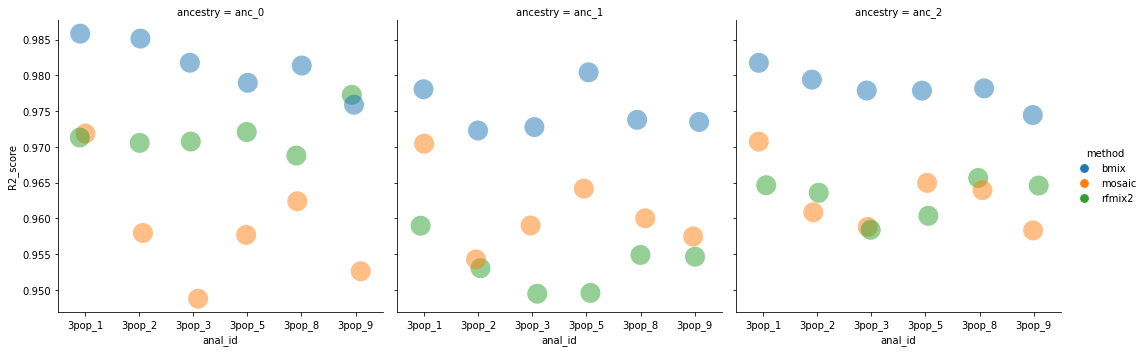

In [7]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ancestry', value_name='R2_score')
sns.catplot(
    x="anal_id",
    y="R2_score",
    hue="method",
    col='ancestry',
    col_order=['anc_0', 'anc_1', 'anc_2'],
    data=data.sort_values('anal_id'),
    dodge=0,
    alpha=.5,
    zorder=1,
    kind='strip',
    aspect = 1,
    s=20
)

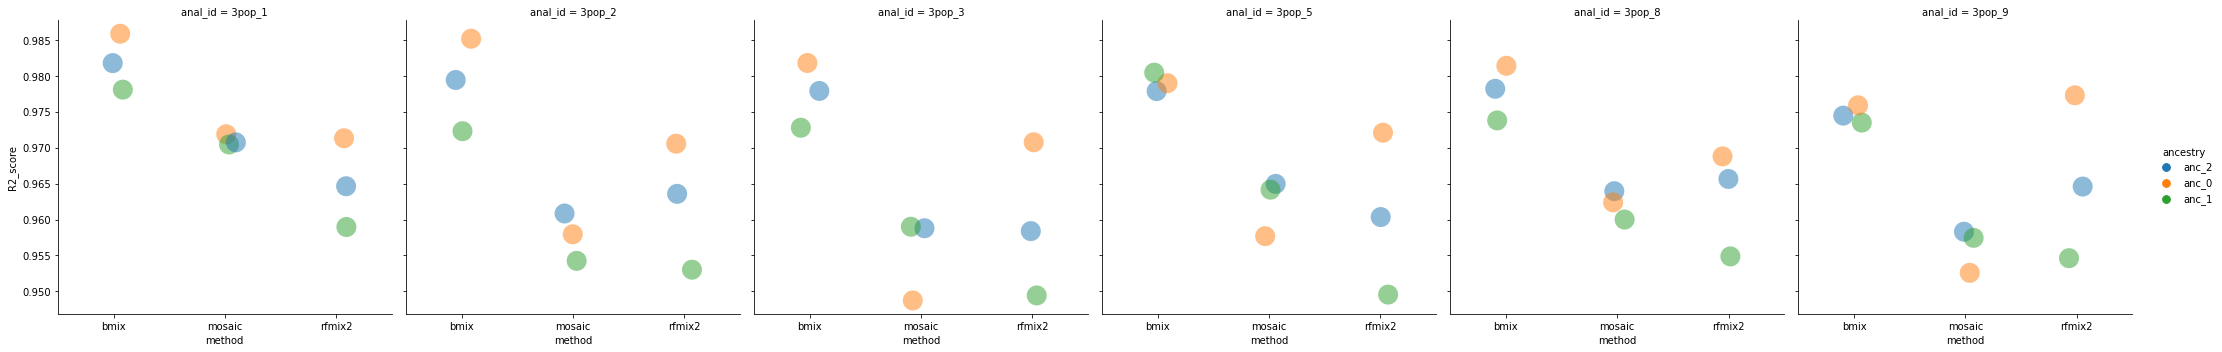

In [8]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ancestry', value_name='R2_score')
sns.catplot(
    x="method",
    y="R2_score",
    hue="ancestry",
    col='anal_id',
    #col_order=['anc_0', 'anc_1', 'anc_2'],
    data=data.sort_values('anal_id'),
    dodge=0,
    alpha=.5,
    zorder=1,
    kind='strip',
    aspect = 1,
    s=20
)

<AxesSubplot:xlabel='anal_id', ylabel='R2_score'>

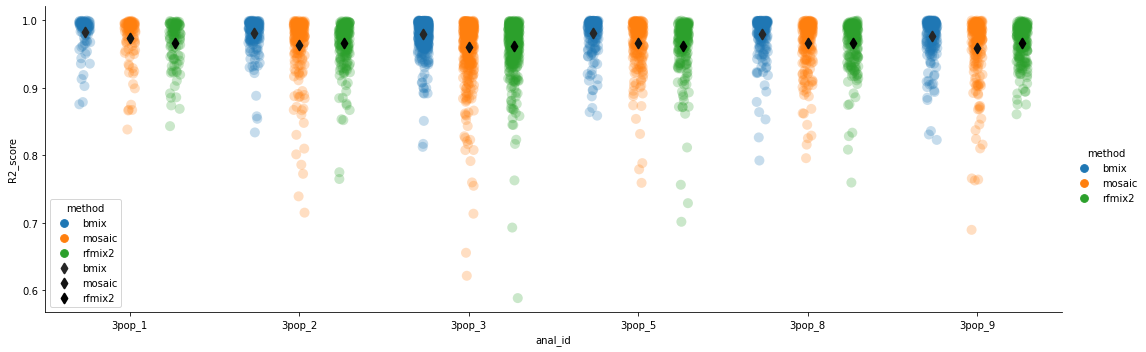

In [9]:
# Show each observation with a scatterplot
data = pd.melt(R2_ind.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ind', value_name='R2_score')
sns.catplot(
    x="anal_id",
    y="R2_score",
    hue="method",
    data=data.sort_values('anal_id'),
    dodge=1,
    alpha=.25,
    zorder=1,
    kind='strip',
    aspect=3,
    s=10
)
sns.pointplot(x="anal_id",
    y="R2_score",
    hue="method",
    data=data.sort_values('anal_id'),
    dodge=.8 - .8 / 3,
    join=False,
    #palette="dark",
    color='k',
    markers="d",
    scale=1,
    ci=None,
    alpha = 1)